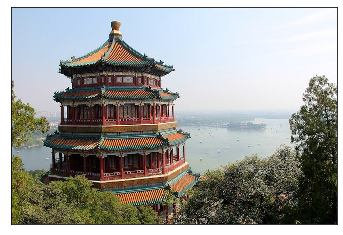

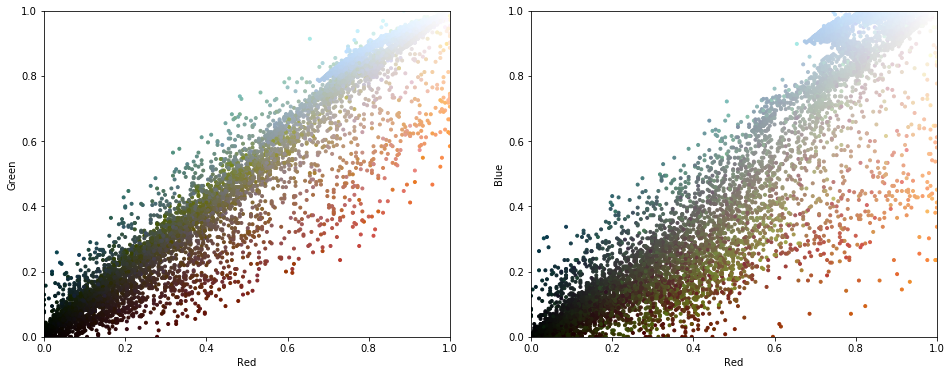

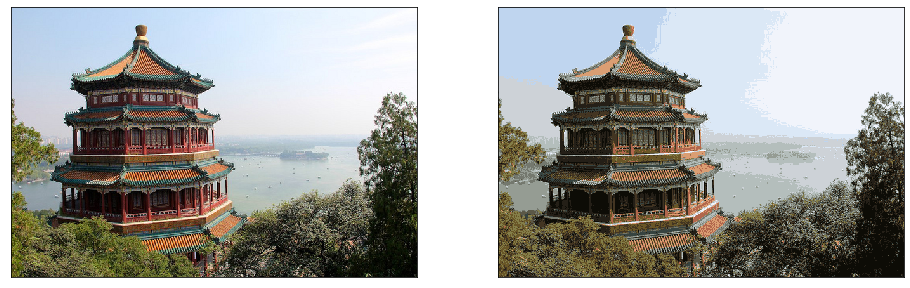

In [53]:
# image compression
import numpy as np
import matplotlib.pyplot as plt
from sklearn .cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image
china=load_sample_image('china.jpg')
data=china/255
data=data.reshape(427*640,3)
data
ax=plt.subplot(xticks=[],yticks=[])
ax.imshow(china)
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
        r=np.random.RandomState(0)
        i=r.permutation(data.shape[0])[:N]
        colors=colors[i]
        R,G,B=data[i].T
        fig,ax=plt.subplots(1,2,figsize=(16,6))
        ax[0].scatter(R,G,color=colors,marker=".")
        ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        ax[1].scatter(R,B,color=colors,marker=".")
        ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
plot_pixels(data,title='color')    
model=MiniBatchKMeans(16)
model.fit(data)
fig,ax=plt.subplots(1,2,figsize=(16,6) ,subplot_kw=(dict(xticks=[],yticks=[])))
new_color=model.cluster_centers_[model.predict(data)]
re_color=new_color.reshape(china.shape)
ax[0].imshow(china)
ax[1].imshow(re_color)

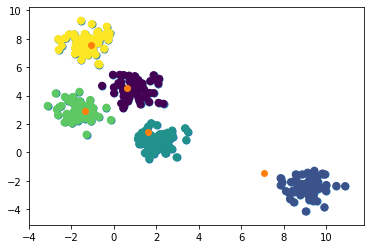

In [80]:
#clusting of data(location)
import numpy as np
from sklearn.cluster import KMeans
from sklearn .metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=300,centers=5,cluster_std=0.6,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50)
model=KMeans(n_clusters=5)
model.fit(x)
prediction=model.predict(x)
def finding_cluster(x,n_cluster):
    r=np.random.RandomState(2)
    i=r.permutation(x.shape[0])[:n_cluster]
    centers=x[i]
    while True:
        labels=pairwise_distances_argmin(x,centers)
        new_centers=np.array([x[labels==i].mean(0)  for i in range(n_cluster)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
        return centers ,labels 
centers,labels=finding_cluster(x,5)
plt.scatter(x[:,0],x[:,1],s=50,c=prediction,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1])